In [1]:
library(tidyverse)
library(gridExtra)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



In [2]:
ppi_df <- read_tsv('../../data/3.all_nodes//ppi.tsv.xz') 

ppi_degree_df <- ppi_df %>%
    select(-starts_with('name')) %>%
    gather('id_side', 'id', id_a:id_b) %>%
    group_by(.dots=c("id")) %>%
    summarize_at(vars(train, test_new), funs(sum)) %>%
    rename(biased=train, unbiased=test_new)

ppi_vis_dists <- ppi_degree_df %>%
    gather('network_type', 'degree', biased:unbiased) %>%
    mutate(name = 'ppi')

head(ppi_vis_dists, 2)

Parsed with column specification:
cols(
  name_a = col_character(),
  name_b = col_character(),
  id_a = col_integer(),
  id_b = col_integer(),
  train = col_integer(),
  test_recon = col_integer(),
  test_new = col_integer()
)


id,network_type,degree,name
0,biased,55,ppi
1,biased,3,ppi


In [3]:
tftg_df <- read_tsv('../../data/3.all_nodes//tftg.tsv.xz')

tftg_degree_df <- tftg_df %>%
    select(-starts_with('name')) %>%
    gather('id_side', 'id', id_a:id_b) %>%
    group_by(.dots=c("id_side", "id")) %>%
    summarize_at(vars(train, test_new), funs(sum)) %>%
    rename(biased=train, unbiased=test_new)

tftg_vis_dists <- tftg_degree_df %>%
    gather('network_type', 'degree', biased:unbiased) %>%
    mutate(name = id_side %>% recode(id_a = 'tftg_source', id_b = 'tftg_target')) %>%
    ungroup() %>%
    select(-id_side)

head(tftg_vis_dists, 2)

Parsed with column specification:
cols(
  name_a = col_character(),
  name_b = col_character(),
  id_a = col_integer(),
  id_b = col_integer(),
  train = col_integer(),
  test_recon = col_integer(),
  test_new = col_integer()
)


id,network_type,degree,name
0,biased,13,tftg_source
1,biased,67,tftg_source


In [4]:
vis_df <- bind_rows(ppi_vis_dists, tftg_vis_dists) %>%
    mutate(name = name %>% recode_factor(ppi = 'PPI', tftg_source = 'TFTG - Transcription factor', 
                                        tftg_target = 'TFTG - Target gene'))

head(vis_df, 2)

id,network_type,degree,name
0,biased,55,PPI
1,biased,3,PPI


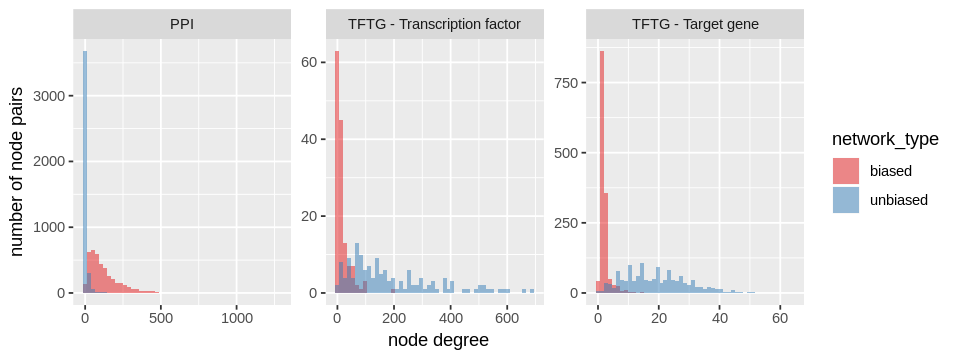

In [5]:
options(repr.plot.width=8, repr.plot.height=3)

vis_dists <- (
    ggplot(vis_df, aes(x = degree, fill=network_type))
    + geom_histogram(position = position_identity(), alpha = 0.5, bins = 50)
    + facet_wrap("name", scales='free')
    + scale_fill_brewer(palette = "Set1")
    + ylab('number of node pairs')
    + xlab('node degree')
)

ggsave(plot = vis_dists, filename = '../../img/degree_dists.png', dpi = 500,
       width=8, height=3)
ggsave(plot = vis_dists, filename = '../../../xswap-manuscript/content/images/degree_dists.png', dpi = 500,
       width=8, height=3)

vis_dists

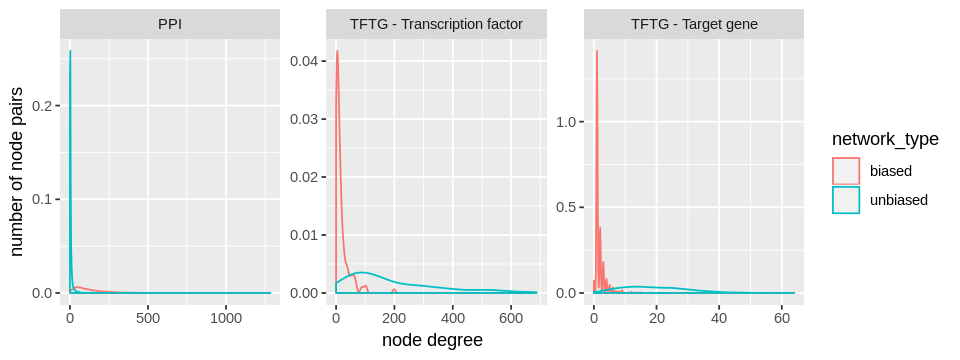

In [5]:
options(repr.plot.width=8, repr.plot.height=3)

vis_dists <- (
    ggplot(vis_df, aes(x = degree, color=network_type))
    + geom_density(position = position_identity(), alpha = 0.5)
    + facet_wrap("name", scales='free')
    + scale_fill_brewer(palette = "Set1")
    + ylab('number of node pairs')
    + xlab('node degree')
)

# ggsave(plot = vis_dists, filename = '../../img/degree_dists.png', dpi = 500,
#        width=8, height=3)
# ggsave(plot = vis_dists, filename = '../../../xswap-manuscript/content/images/degree_dists.png', dpi = 500,
#        width=8, height=3)

vis_dists

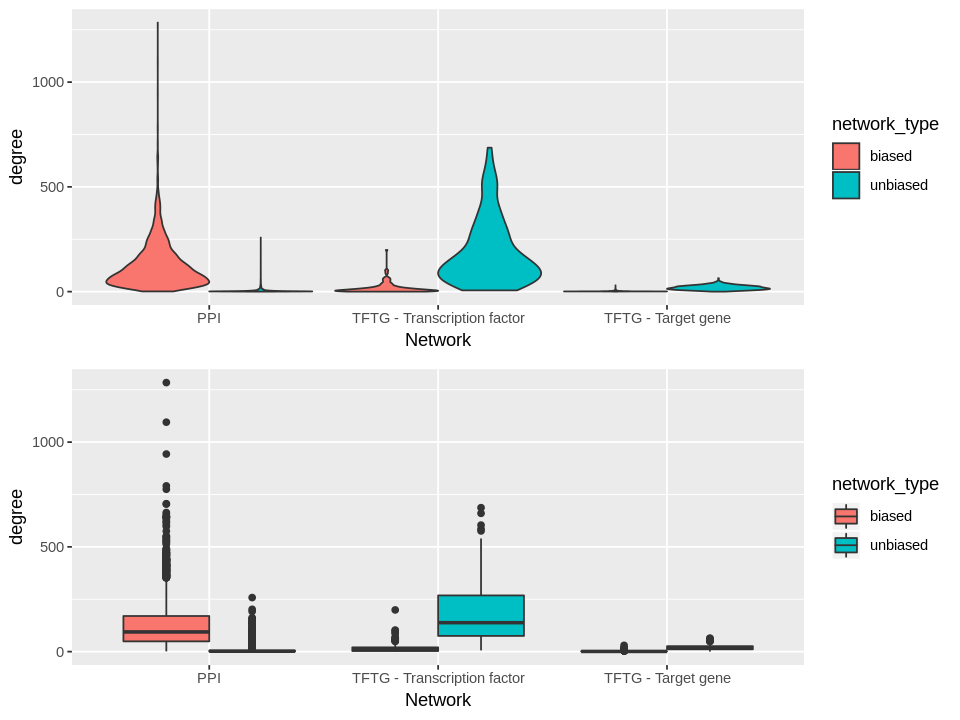

In [6]:
options(repr.plot.width=8, repr.plot.height=6)

violin <- (
    ggplot(vis_df, aes(x = name, y = degree, fill = network_type))
    + geom_violin(scale = 'width')
    + xlab('Network')
)

box <- (
    ggplot(vis_df, aes(x = name, y = degree, fill = network_type))
    + geom_boxplot(position = 'dodge')
    + xlab('Network')
)

grid.arrange(violin, box)